# Self-Driving Car Engineer Nanodegree


## Project 2: **Advanced Lane Lines** 
***
The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---

## Import Packages

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import pickle

## Perspective Transform
---

#### Unwarp Test Image
Use an undistorted test image as an example image to determine points for perspective transform.

perspective transform example


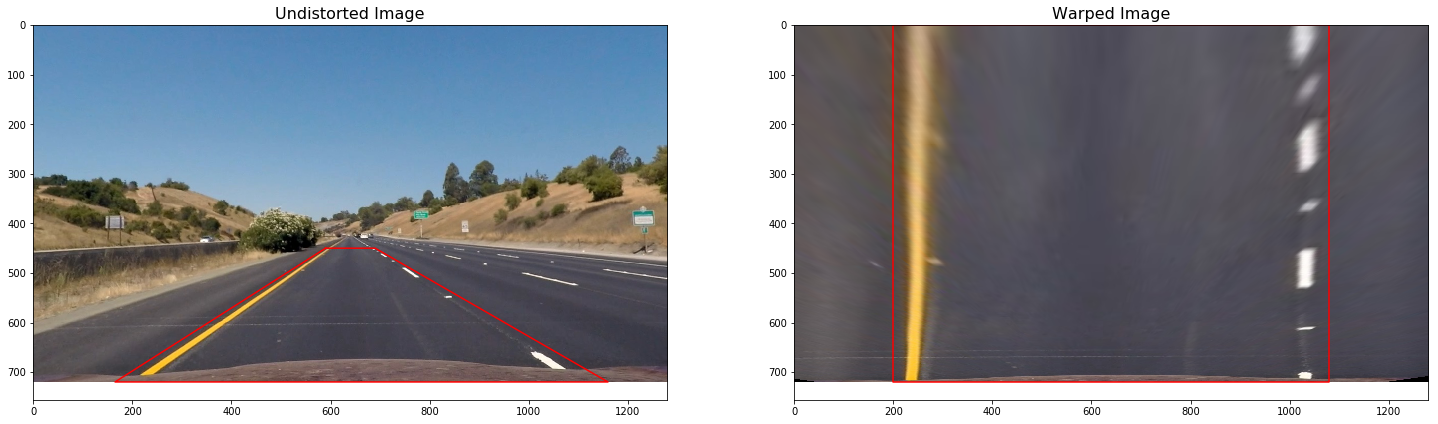

In [2]:
# load camera calibration data generated previously
cam_cal = pickle.load( open('./camera_cal_data.p', 'rb' ) )
mtx, dist = map(cam_cal.get, ('mtx', 'dist'))

# load example image with straight lines to use as test
img = mpimg.imread('./test_images/straight_lines1.jpg') # rgb image

# undistort image
undist = cv2.undistort(img, mtx, dist, None, mtx)

# points to use for box
offset = 200
img_size = (undist.shape[1], undist.shape[0])

#source points for straight lane line
src = np.float32([[590, 450], [690, 450],
                         [1160, img_size[1]], [165, img_size[1]]])
    
dst = np.float32([[offset, 0],[img_size[0]-offset, 0],
                         [img_size[0]-offset, img_size[1]], [offset, img_size[1]]])

# unwarped image
M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)
warped = cv2.warpPerspective(undist, M, img_size)

# separating x, y axis to draw on undistorted image
src_x = src.T[0]
src_x = np.append(src_x, src_x[0])
src_y = src.T[1]
src_y = np.append(src_y, src_y[0])

dst_x = dst.T[0]
dst_x = np.append(dst_x, dst_x[0])
dst_y = dst.T[1]
dst_y = np.append(dst_y, dst_y[0])

fig, ax = plt.subplots(1, 2, figsize=(25,8))

ax[0].imshow(undist)
ax[0].plot(src_x, src_y, color='#FF0000')
ax[0].set_title('Undistorted Image', fontsize=16)

ax[1].imshow(warped)
ax[1].plot(dst_x, dst_y, color='#FF0000')
ax[1].set_title('Warped Image', fontsize=16)

# save warp data for later use
pickle.dump({'M': M, 'Minv': Minv}, open('./warp_data.p', 'wb'))

print('perspective transform example')